In [1]:
!pip install pycutest

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 KB 5.9 MB/s eta 0:00:00


In [13]:
# loading packages
import pycutest as pqt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
p = pqt.import_problem("ROSENBR")

In [15]:
p.n

2

In [26]:
p.obj(np.array([0,1]))

101.0

In [7]:
x0 = p.x0
x0

array([-1.2,  1. ])

In [9]:
p.grad(x0)

array([-215.6,  -88. ])

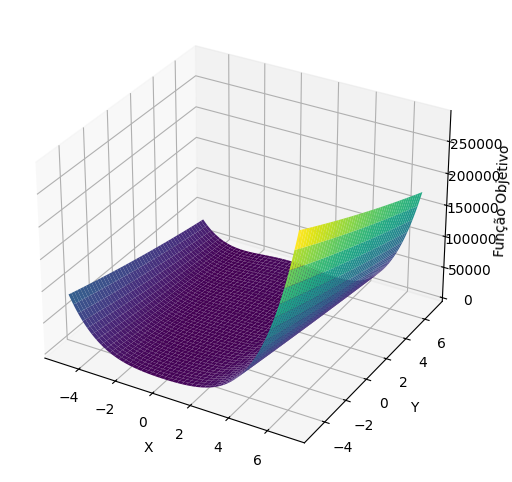

In [19]:
# Gerar valores de x e y para a plotagem 2D
x_vals = np.linspace(-5, 7, 400)  # Faixa de valores para X
y_vals = np.linspace(-5, 7, 400)  # Faixa de valores para Y

# Criar uma grade de pontos
X, Y = np.meshgrid(x_vals, y_vals)

# Avaliar a função objetivo para cada par (x, y)
Z = np.array([[p.obj(np.array([x, y])) for x in x_vals] for y in y_vals])

# Criar o gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
ax.plot_surface(X, Y, Z, cmap='viridis')

# Adicionar rótulos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Função Objetivo')

# Mostrar o gráfico
plt.show()

# Non-linear Optimization Project - Spectral Gradient Method

    The present work is part of the Non-linear Optimization Course of UNICAMP (MS629). The purpose of the project is the implementation of three algorithms of optimization: Descendent Gradient, BFGS Quasi-Newton and Spectral Gradient methods. All the algorithms were implemented using python and the library pyCUTest.

## 1. Descendent Gradient Method

In [ ]:
# building the method/function
def steepest_descent(x0,fx,gradf):
    xk = x0
    k = 0
    while (gradf(xk) != 0 or k>100): # stop condition
        d = -gradf(xk) # steepest descent direction
        alpha =  armijo (fx, d, xk)
        xk = x0+alpha* d
        k +=1